In [1]:
import numpy as np
from floris.tools import FlorisInterface
import matplotlib.pyplot as plt
from floris.tools.visualization import visualize_cut_plane


In [2]:
fi = FlorisInterface("gch.yaml")

wind_turbine_diameter = 126 #meters

wind_directions = [0.0, 270.0, 180.0]
wind_speeds = [10.0, 7.0, 5.0]

y_2x2 = np.repeat([0,1,2,3,4,5,6,7,8,9],10) * wind_turbine_diameter * 3
x_2x2 = np.tile([0,1,2,3,4,5,6,7,8,9],10) * wind_turbine_diameter * 8



fi.reinitialize(layout_x=x_2x2,
                layout_y=y_2x2,
                wind_directions=wind_directions,
                wind_speeds=wind_speeds)

x, y = fi.get_turbine_layout()

print("     x       y")
for _x, _y in zip(x, y):
    print(f"{_x:6.1f}, {_y:6.1f}")

     x       y
   0.0,    0.0
1008.0,    0.0
2016.0,    0.0
3024.0,    0.0
4032.0,    0.0
5040.0,    0.0
6048.0,    0.0
7056.0,    0.0
8064.0,    0.0
9072.0,    0.0
   0.0,  378.0
1008.0,  378.0
2016.0,  378.0
3024.0,  378.0
4032.0,  378.0
5040.0,  378.0
6048.0,  378.0
7056.0,  378.0
8064.0,  378.0
9072.0,  378.0
   0.0,  756.0
1008.0,  756.0
2016.0,  756.0
3024.0,  756.0
4032.0,  756.0
5040.0,  756.0
6048.0,  756.0
7056.0,  756.0
8064.0,  756.0
9072.0,  756.0
   0.0, 1134.0
1008.0, 1134.0
2016.0, 1134.0
3024.0, 1134.0
4032.0, 1134.0
5040.0, 1134.0
6048.0, 1134.0
7056.0, 1134.0
8064.0, 1134.0
9072.0, 1134.0
   0.0, 1512.0
1008.0, 1512.0
2016.0, 1512.0
3024.0, 1512.0
4032.0, 1512.0
5040.0, 1512.0
6048.0, 1512.0
7056.0, 1512.0
8064.0, 1512.0
9072.0, 1512.0
   0.0, 1890.0
1008.0, 1890.0
2016.0, 1890.0
3024.0, 1890.0
4032.0, 1890.0
5040.0, 1890.0
6048.0, 1890.0
7056.0, 1890.0
8064.0, 1890.0
9072.0, 1890.0
   0.0, 2268.0
1008.0, 2268.0
2016.0, 2268.0
3024.0, 2268.0
4032.0, 2268.0
5040.0, 22

Dimensions of grid x-components
(3, 3, 100, 3, 3)

Turbine 3 grid x-components for first wind direction and first wind speed
[[6237. 6237. 6237.]
 [6237. 6237. 6237.]
 [6237. 6237. 6237.]]


(0.0, 150.0)

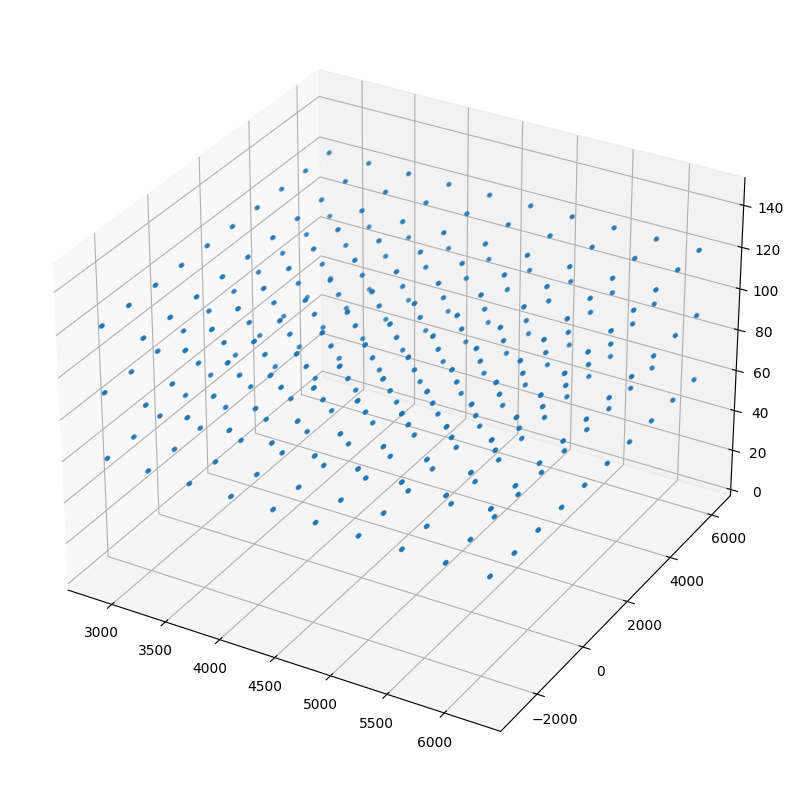

In [3]:
print("Dimensions of grid x-components")
print( np.shape(fi.floris.grid.x) )

print()
print("Turbine 3 grid x-components for first wind direction and first wind speed")
print(fi.floris.grid.x[0, 0, 2, :, :])

x = fi.floris.grid.x[0, 0, :, :, :]
y = fi.floris.grid.y[0, 0, :, :, :]
z = fi.floris.grid.z[0, 0, :, :, :]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, marker=".")
ax.set_zlim([0, 150])

In [4]:
fi.calculate_wake()

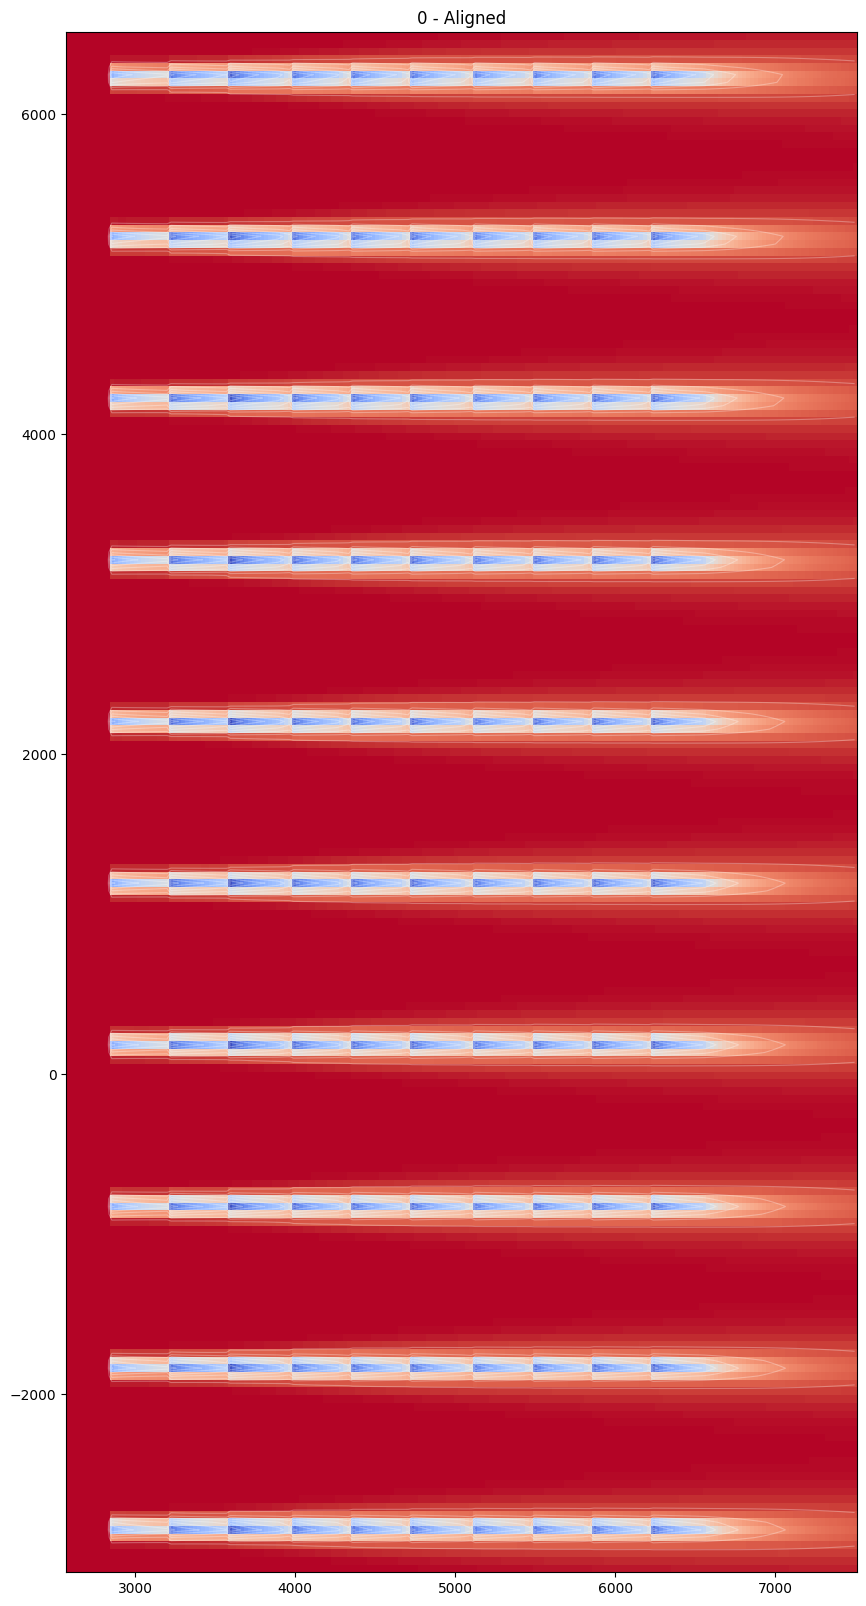

In [5]:


fig, ax = plt.subplots(1, 1, figsize=(20,20))

horizontal_plane = fi.calculate_horizontal_plane(wd=[wind_directions[0]], ws=[wind_speeds[0]], height=90.0)
visualize_cut_plane(horizontal_plane, ax=ax, title="0 - Aligned")

#horizontal_plane = fi.calculate_horizontal_plane(wd=[wind_directions[1]],ws=[wind_speeds[1]], height=90.0)
#visualize_cut_plane(horizontal_plane, ax=ax[1], title="270 - Aligned")

#horizontal_plane = fi.calculate_horizontal_plane(wd=[wind_directions[2]],ws=[wind_speeds[2]], height=90.0)
#visualize_cut_plane(horizontal_plane, ax=ax[2], title="180 - Aligned")

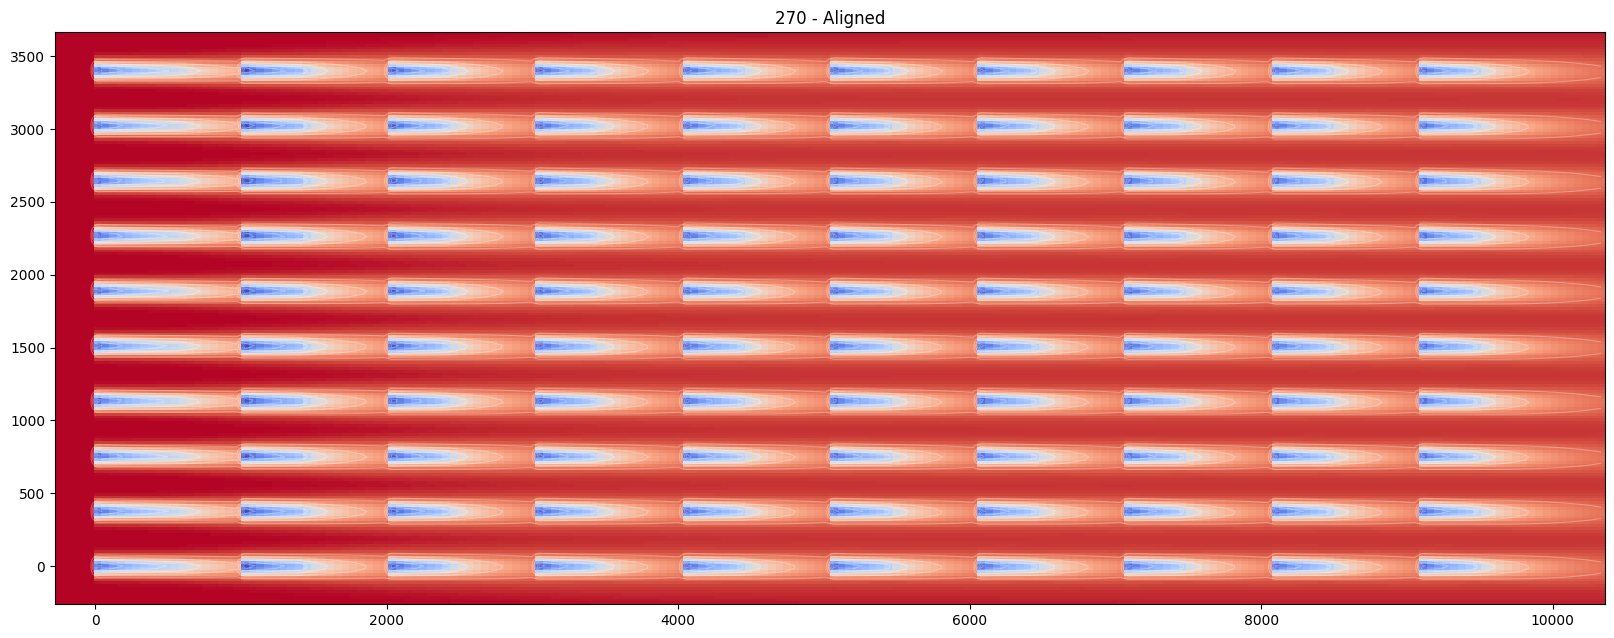

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))

horizontal_plane = fi.calculate_horizontal_plane(wd=[wind_directions[1]],ws=[wind_speeds[1]], height=90.0)
visualize_cut_plane(horizontal_plane, ax=ax, title="270 - Aligned")

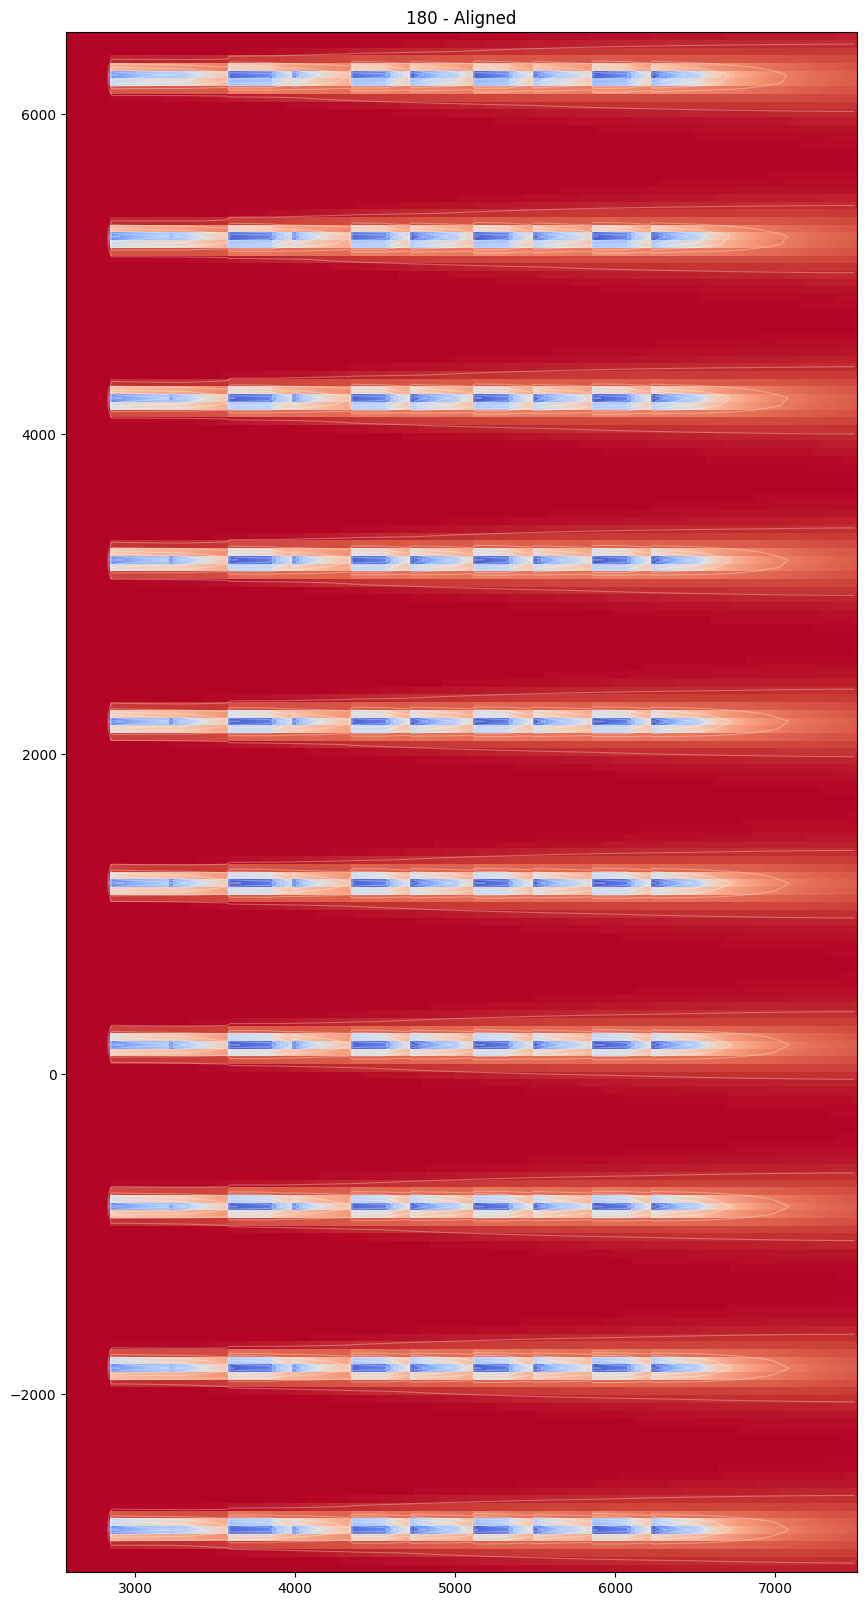

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))

horizontal_plane = fi.calculate_horizontal_plane(wd=[wind_directions[2]],ws=[wind_speeds[2]], height=90.0)
visualize_cut_plane(horizontal_plane, ax=ax, title="180 - Aligned")

In [9]:
powers = fi.get_turbine_powers() / 1000.0  # calculated in Watts, so convert to kW

print("Dimensions of `powers`")
print( np.shape(powers) )

for i in range(3):
    for j in range(fi.floris.farm.n_turbines):
        print(f"  Turbine {j} - {powers[i, 0, j]:.2f} kW")
    print()

Dimensions of `powers`
(3, 3, 100)
  Turbine 0 - 528.79 kW
  Turbine 1 - 529.73 kW
  Turbine 2 - 529.59 kW
  Turbine 3 - 529.81 kW
  Turbine 4 - 529.77 kW
  Turbine 5 - 530.12 kW
  Turbine 6 - 529.64 kW
  Turbine 7 - 529.72 kW
  Turbine 8 - 529.59 kW
  Turbine 9 - 528.96 kW
  Turbine 10 - 525.46 kW
  Turbine 11 - 526.13 kW
  Turbine 12 - 526.29 kW
  Turbine 13 - 526.50 kW
  Turbine 14 - 526.34 kW
  Turbine 15 - 526.60 kW
  Turbine 16 - 526.20 kW
  Turbine 17 - 526.30 kW
  Turbine 18 - 526.19 kW
  Turbine 19 - 525.63 kW
  Turbine 20 - 522.42 kW
  Turbine 21 - 522.96 kW
  Turbine 22 - 523.09 kW
  Turbine 23 - 523.15 kW
  Turbine 24 - 523.36 kW
  Turbine 25 - 523.18 kW
  Turbine 26 - 523.01 kW
  Turbine 27 - 523.06 kW
  Turbine 28 - 523.04 kW
  Turbine 29 - 522.45 kW
  Turbine 30 - 521.28 kW
  Turbine 31 - 521.62 kW
  Turbine 32 - 521.71 kW
  Turbine 33 - 521.74 kW
  Turbine 34 - 521.75 kW
  Turbine 35 - 521.72 kW
  Turbine 36 - 521.69 kW
  Turbine 37 - 521.55 kW
  Turbine 38 - 521.70 kW


In [12]:
power1 = []
for i in range(fi.floris.farm.n_turbines):
    power1.append(powers[0][0][i])

power2 = []
for i in range(fi.floris.farm.n_turbines):
    power2.append(powers[1][0][i])

power3 = []
for i in range(fi.floris.farm.n_turbines):
    power3.append(powers[2][0][i])

Text(0.5, 1.0, 'Power Output as a Function of Turbine # at 10 m/s')

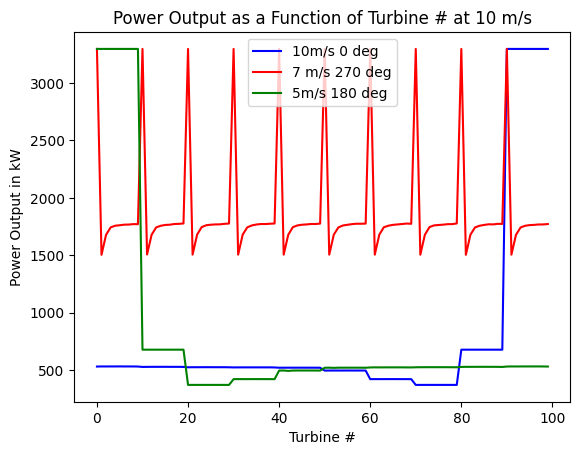

In [13]:
plt.plot(power1,'b',label='10m/s 0 deg')
plt.plot(power2,'r',label='7 m/s 270 deg')
plt.plot(power3, 'g', label='5m/s 180 deg')
plt.xlabel('Turbine #')
plt.ylabel('Power Output in kW')
plt.legend()
plt.title('Power Output as a Function of Turbine # at 10 m/s')